In [66]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [67]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron


iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [68]:
y_pred

array([1])

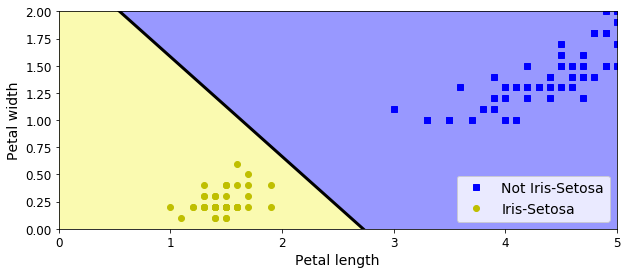

In [69]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()


In [70]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(z, 0)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

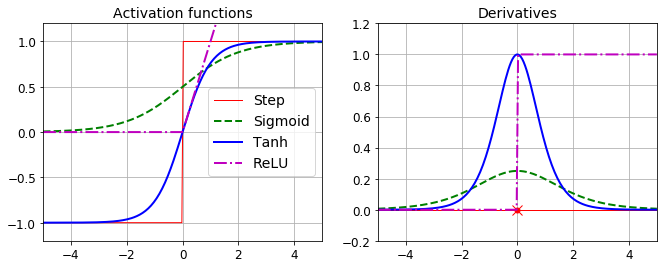

In [71]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [72]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-0.5 + (-activation(-1.5 + x1 + x2)) + activation(-0.5 + x1 + x2))

[[-0.2        -0.2        -0.2        -0.2        -0.2        -0.2
  -0.2        -0.2        -0.2        -0.2        -0.2        -0.2
  -0.2        -0.2        -0.2        -0.2        -0.2        -0.2
  -0.2        -0.2        -0.2        -0.2        -0.2        -0.2
  -0.2        -0.2        -0.2        -0.2        -0.2        -0.2
  -0.2        -0.2        -0.2        -0.2        -0.2        -0.2
  -0.2        -0.2        -0.2        -0.2        -0.2        -0.2
  -0.2        -0.2        -0.2        -0.2        -0.2        -0.2
  -0.2        -0.2        -0.2        -0.2        -0.2        -0.2
  -0.2        -0.2        -0.2        -0.2        -0.2        -0.2
  -0.2        -0.2        -0.2        -0.2        -0.2        -0.2
  -0.2        -0.2        -0.2        -0.2        -0.2        -0.2
  -0.2        -0.2        -0.2        -0.2        -0.2        -0.2
  -0.2        -0.2        -0.2        -0.2        -0.2        -0.2
  -0.2        -0.2        -0.2        -0.2        -0.2        

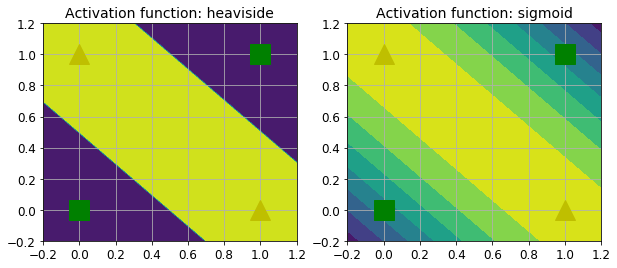

In [73]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

print(x2[:2])

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [74]:
import tensorflow as tf

In [75]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28 * 28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28 * 28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]


In [76]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300, 100], n_classes=10, feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

W0919 20:29:24.201344 140734795240896 estimator.py:1811] Using temporary folder as model directory: /var/folders/yq/4hj71qqn7cq44p5zrv_100j40000gp/T/tmpzg9nawsu


In [77]:
print(X_train.shape)

(55000, 784)


In [78]:
valid_input_fn = tf.estimator.inputs.numpy_input_fn(x={"X": X_valid}, y=y_valid, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=valid_input_fn)

In [79]:
eval_results

{'accuracy': 0.982,
 'average_loss': 0.09565534,
 'loss': 11.956917,
 'global_step': 44000}

In [80]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(x={"X": X_test}, y=y_test, shuffle=False)
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

{'logits': array([ -7.4078193,   2.8550382,   1.8491653,   6.945245 ,  -5.996856 ,
         -0.6053193, -10.372234 ,  22.27766  ,  -4.490141 ,   2.99006  ],
       dtype=float32),
 'probabilities': array([1.2816213e-13, 3.6716565e-09, 1.3428177e-09, 2.1938979e-07,
        5.2545213e-13, 1.1535802e-10, 6.6119684e-15, 9.9999976e-01,
        2.3707813e-12, 4.2024433e-09], dtype=float32),
 'class_ids': array([7]),
 'classes': array([b'7'], dtype=object),
 'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
       dtype=object)}

In [81]:
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10


In [82]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [83]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [84]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [85]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [86]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [87]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [88]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()


In [89]:
n_epochs = 40
batch_size = 50

In [90]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [91]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y:y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y:y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)
    
    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9148
1 Batch accuracy: 0.92 Val accuracy: 0.9358
2 Batch accuracy: 0.96 Val accuracy: 0.945
3 Batch accuracy: 0.92 Val accuracy: 0.951
4 Batch accuracy: 0.98 Val accuracy: 0.9558
5 Batch accuracy: 0.96 Val accuracy: 0.9566
6 Batch accuracy: 1.0 Val accuracy: 0.9614
7 Batch accuracy: 0.94 Val accuracy: 0.963
8 Batch accuracy: 0.98 Val accuracy: 0.9652
9 Batch accuracy: 0.96 Val accuracy: 0.966
10 Batch accuracy: 0.92 Val accuracy: 0.9684
11 Batch accuracy: 0.98 Val accuracy: 0.9692
12 Batch accuracy: 0.98 Val accuracy: 0.9674
13 Batch accuracy: 0.98 Val accuracy: 0.9706
14 Batch accuracy: 1.0 Val accuracy: 0.9712
15 Batch accuracy: 0.94 Val accuracy: 0.9734
16 Batch accuracy: 1.0 Val accuracy: 0.9736
17 Batch accuracy: 1.0 Val accuracy: 0.9742
18 Batch accuracy: 1.0 Val accuracy: 0.9746
19 Batch accuracy: 0.98 Val accuracy: 0.9748
20 Batch accuracy: 1.0 Val accuracy: 0.9754
21 Batch accuracy: 1.0 Val accuracy: 0.9758
22 Batch accuracy: 0.98 Val accu

In [92]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

In [93]:
print("predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [94]:
from tensorflow_graph_in_jupyter import show_graph

show_graph(tf.get_default_graph())

In [95]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 40
batch_size = 50

def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y:y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y:y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)
    
    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9024
1 Batch accuracy: 0.92 Val accuracy: 0.9254
2 Batch accuracy: 0.94 Val accuracy: 0.9372
3 Batch accuracy: 0.9 Val accuracy: 0.9416
4 Batch accuracy: 0.94 Val accuracy: 0.9472
5 Batch accuracy: 0.94 Val accuracy: 0.9512
6 Batch accuracy: 1.0 Val accuracy: 0.9548
7 Batch accuracy: 0.94 Val accuracy: 0.961
8 Batch accuracy: 0.96 Val accuracy: 0.9622
9 Batch accuracy: 0.94 Val accuracy: 0.9648
10 Batch accuracy: 0.92 Val accuracy: 0.9658
11 Batch accuracy: 0.98 Val accuracy: 0.9666
12 Batch accuracy: 0.98 Val accuracy: 0.9684
13 Batch accuracy: 0.98 Val accuracy: 0.9702
14 Batch accuracy: 1.0 Val accuracy: 0.9696
15 Batch accuracy: 0.94 Val accuracy: 0.9718
16 Batch accuracy: 0.98 Val accuracy: 0.9728
17 Batch accuracy: 1.0 Val accuracy: 0.973
18 Batch accuracy: 0.98 Val accuracy: 0.9746
19 Batch accuracy: 0.98 Val accuracy: 0.9752
20 Batch accuracy: 1.0 Val accuracy: 0.975
21 Batch accuracy: 1.0 Val accuracy: 0.9734
22 Batch accuracy: 0.96 Val ac

In [99]:
from datetime import datetime


reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)
    
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "_"
    name = prefix + "run_" + now
    return "{}/{}/".format(root_logdir, name)

logdir = log_dir("mnist_dnn")

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

m, n = X_train.shape
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
fimal_model_path = './my_deep_mnist_model'

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        
with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupter. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)
        
    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], 
                                                                                  feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch, "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100), "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss: 
                saver.save(sess, fimal_model_path)
                best_loss = loss_val 
            else: 
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break


Training was interrupter. Continuing at epoch 1461
Epoch: 1465 	Validation accuracy: 98.200% 	Loss: 0.10102
Epoch: 1470 	Validation accuracy: 98.200% 	Loss: 0.10104
Epoch: 1475 	Validation accuracy: 98.200% 	Loss: 0.10110
Epoch: 1480 	Validation accuracy: 98.200% 	Loss: 0.10109
Epoch: 1485 	Validation accuracy: 98.200% 	Loss: 0.10121
Epoch: 1490 	Validation accuracy: 98.200% 	Loss: 0.10122
Epoch: 1495 	Validation accuracy: 98.200% 	Loss: 0.10128
Epoch: 1500 	Validation accuracy: 98.200% 	Loss: 0.10133
Epoch: 1505 	Validation accuracy: 98.200% 	Loss: 0.10144
Epoch: 1510 	Validation accuracy: 98.200% 	Loss: 0.10138
Epoch: 1515 	Validation accuracy: 98.200% 	Loss: 0.10136
Epoch: 1520 	Validation accuracy: 98.200% 	Loss: 0.10145
Early stopping
